In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 모든 컬럼 생략없이 출력하기 위한 옵션
pd.set_option('display.max_columns', None)

In [3]:
path = "../dataset/ml-latest-small/"
os.path.isdir(path)

True

# data load

In [4]:
rating_df = pd.read_csv(os.path.join(path + "ratings.csv"), encoding="utf-8")
movies_df = pd.read_csv(os.path.join(path + "movies.csv"), encoding="utf-8")
tags_df = pd.read_csv(os.path.join(path + "tags.csv"), encoding="utf-8")

# ▶ data 구성 확인

### 1. rating_df

In [5]:
rating_df.shape, rating_df.head()

((100836, 4),
    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931)

### 2. movies_df

In [6]:
movies_df.shape, movies_df.head()

((9742, 3),
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  )

### 3. tags_df

In [7]:
tags_df.shape, tags_df.head()

((3683, 4),
    userId  movieId              tag   timestamp
 0       2    60756            funny  1445714994
 1       2    60756  Highly quotable  1445714996
 2       2    60756     will ferrell  1445714992
 3       2    89774     Boxing story  1445715207
 4       2    89774              MMA  1445715200)

# ▶ 평점 데이터 rating_df의 데이터 분석(기초 통계)

### ▷ 기본 정보 확인

In [8]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


### ▷ 평점을 준 유저는 몇 명인가?

In [9]:
len(rating_df.groupby(["userId"]))

610

In [10]:
# unique()로 구할 수도 있음
len(rating_df.userId.unique())

610

### ▷ 평점을 받은 영화의 수는 몇 개인가? 

In [11]:
len(rating_df.movieId.unique())  # 9742개의 영화 중 평점 받은 영화 9742개

9724

### ▷ 평점의 평균, 표준편차 등 통계에 대한 데이터를 확인

In [12]:
rating_df.rating.describe()
# 평균이 3.5이고 표준편차가 1.0 정도이므로 점수가 2.5~4.5 사이에 많이 분포되어 있음을 알 수 있음

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

### ▷ NaN 유무 확인 : ```isnull()```

In [13]:
rating_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

# ▶ ```groupby()```를 활용한 통계 연습

### ▷ 유저별 평점 평균
userId가 1인 사람의 평균 평점, 2인 사람의 평균 평점, ...

In [14]:
rating_df.groupby('userId').mean()['rating']
# == rating_df.groupby('userId')['rating'].mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

### ▷ 유저별 평점별 평가 횟수
1번 유저가 1점을 몇 번 줬는지, 2점을 몇 번 줬는지 등에 대한 통계

In [15]:
rating_df.groupby(['userId', 'rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

### ▷ 유저가 평점을 준 영화의 수

In [16]:
rating_df.groupby("userId")["movieId"].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: movieId, Length: 610, dtype: int64

### ▷ 유저가 평균적으로 준 평점과 평점을 준 영화의 수 -> DataFrame으로 반환

In [17]:
user_avg_rating = rating_df.groupby('userId')['rating'].mean()  # 유저별 평균 평점
user_rating_movie_cnt = rating_df.groupby("userId")["movieId"].count()  # 유저별 평점 영화 수

stat_df = pd.concat([user_avg_rating, user_rating_movie_cnt], axis=1)
stat_df

,rating,movieId
userId,,
1,4.366379,232
2,3.948276,29
3,2.435897,39
4,3.555556,216
5,3.636364,44
...,...,...
606,3.657399,1115
607,3.786096,187
608,3.134176,831


In [18]:
stat_df2 = pd.DataFrame({
    "rating_mean": user_avg_rating,
    "movie_count": user_rating_movie_cnt
    })
stat_df2

,rating_mean,movie_count
userId,,
1,4.366379,232
2,3.948276,29
3,2.435897,39
4,3.555556,216
5,3.636364,44
...,...,...
606,3.657399,1115
607,3.786096,187
608,3.134176,831


# new!! ▶ 영화별 평점이 얼마인지, 얼마나 많은 평가를 받았는지 등에 대한 통계

In [20]:
# movie_stat_df 생성하고 mean, count 등을 확인해보기
movie_stat_df = pd.DataFrame({
    # count() : NaN은 카운트하지 않음
    "cnt_user_ratings": rating_df.groupby("movieId")["userId"].count(),
    "mean_ratings": rating_df.groupby("movieId")["rating"].mean(),
    "std_ratings": rating_df.groupby("movieId")["rating"].std(),
})

In [22]:
movie_stat_df.head()

,cnt_user_ratings,mean_ratings,std_ratings
movieId,,,
1,215,3.920930,0.834859
2,110,3.431818,0.881713
3,52,3.259615,1.054823
4,7,2.357143,0.852168
5,49,3.071429,0.907148


In [25]:
# join 하기 전 평점을 가장 많이 받은 영화순(movieId)으로 sorting
movie_stat_df.sort_values(by="cnt_user_ratings", 
                          ascending=False, 
                          # inplace=True
                         )

,cnt_user_ratings,mean_ratings,std_ratings
movieId,,,
356,329,4.164134,0.831244
318,317,4.429022,0.713019
296,307,4.197068,0.951997
593,279,4.161290,0.853983
2571,278,4.192446,0.975243
...,...,...,...
4093,1,1.500000,NaN
4089,1,2.000000,NaN
58351,1,4.000000,NaN


In [30]:
df_join_movies = pd.merge(movie_stat_df, movies_df,  # <- 이 두 개의 DataFrame을 join하기
                         how="left",
                         left_on="movieId",
                         right_on="movieId")  # join할거면 merge. not concat
print(len(df_join_movies))

9724


In [31]:
df_join_movies

,movieId,cnt_user_ratings,mean_ratings,std_ratings,title,genres
0,1,215,3.920930,0.834859,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,0.881713,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,1.054823,Grumpier Old Men (1995),Comedy|Romance
3,4,7,2.357143,0.852168,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,3.071429,0.907148,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
9719,193581,1,4.000000,NaN,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9720,193583,1,3.500000,NaN,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9721,193585,1,3.500000,NaN,Flint (2017),Drama
9722,193587,1,3.500000,NaN,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [37]:
movie_stat_df_1 = movie_stat_df.reset_index()  
# movie_stat_df는 movieId를 인덱스로 인식하기 때문에
# 같은 컬럼 찾기 실패해서 에러뜸. 그래서 강제로 인덱스 생성해서 조인해줌

df_join_movies_1 = pd.merge(movie_stat_df_1, movies_df)
df_join_movies_1.head()

,movieId,cnt_user_ratings,mean_ratings,std_ratings,title,genres
0,1,215,3.920930,0.834859,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,0.881713,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,1.054823,Grumpier Old Men (1995),Comedy|Romance
3,4,7,2.357143,0.852168,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,3.071429,0.907148,Father of the Bride Part II (1995),Comedy


In [35]:
df_join_movies_2 = pd.merge(movie_stat_df, movies_df, 
                         how="inner",
                         on="movieId") 
df_join_movies_2.head()

,movieId,cnt_user_ratings,mean_ratings,std_ratings,title,genres
0,1,215,3.920930,0.834859,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,3.431818,0.881713,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,3.259615,1.054823,Grumpier Old Men (1995),Comedy|Romance
3,4,7,2.357143,0.852168,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,49,3.071429,0.907148,Father of the Bride Part II (1995),Comedy


## ▷ 특정 영화에 대해 평점 분포 등 알아보기
- Forest Gump : 356 (movieId)
- matrix : 2571

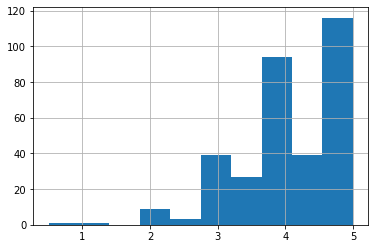

In [41]:
# 평점의 분포를 histogram으로 표현 : pandas의 hist()
hist = rating_df[rating_df["movieId"] == 356]["rating"].hist()

### * 다중 조건 적용해보기

In [43]:
# movieId가 356번이고 rating이 2 이하인 데이터 
rating_df[(rating_df.movieId == 356) & (rating_df.rating <= 2)]

,userId,movieId,rating,timestamp
2339,19,356,2.0,965706045
5665,41,356,2.0,1459367500
12274,76,356,1.0,1439165536
12720,81,356,2.0,845299676
13553,89,356,0.5,1520408275
27554,187,356,2.0,1161863877
28598,199,356,2.0,940372744
30941,217,356,2.0,955943574
35211,237,356,2.0,1411233529
38912,268,356,2.0,940180694


In [44]:
# movieId가 356번이거나 2571번인 영화정보 
movies_df[(movies_df.movieId == 356) | (movies_df.movieId == 2571)]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


### * userId가 1인 사람이 평점 4.0점 이상을 준 영화를 [평점, timestamp] 기준으로 내림차순 정렬 후 제목과 장르 출력
### ** 방법 1

In [85]:
userId_1 = rating_df[(rating_df.userId == 1) & (rating_df.rating >= 4.0)].sort_values(by=["rating", "timestamp"], ascending=False)
userId_1_title = pd.merge(userId_1["movieId"], movies_df)  # <- 이 두 개의 DataFrame을 join하기
userId_1_title[["title", "genres"]]

,title,genres
0,Tombstone (1993),Action|Drama|Western
1,Canadian Bacon (1995),Comedy|War
2,Pink Floyd: The Wall (1982),Drama|Musical
3,"Messenger: The Story of Joan of Arc, The (1999)",Drama|War
4,"Good Morning, Vietnam (1987)",Comedy|Drama|War
...,...,...
195,Shaft (2000),Action|Crime|Thriller
196,Road Trip (2000),Comedy
197,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
198,"13th Warrior, The (1999)",Action|Adventure|Fantasy


### ** 방법2

In [87]:
# 근데 내림차순 정렬한게 사라짐ㅠ
userId_1_title2 = movies_df[movies_df["movieId"].isin(userId_1["movieId"])]
userId_1_title2

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
5,6,Heat (1995),Action|Crime|Thriller
43,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...
2802,3744,Shaft (2000),Action|Crime|Thriller
2836,3793,X-Men (2000),Action|Adventure|Sci-Fi
2847,3809,What About Bob? (1991),Comedy
2991,4006,Transformers: The Movie (1986),Adventure|Animation|Children|Sci-Fi


### ** 방법 3

In [91]:
movie_df_index = movies_df.set_index('movieId')
userId_1_title3 = movie_df_index[["title", "genres"]].loc[userId_1["movieId"]]
userId_1_title3

,title,genres
movieId,,
553,Tombstone (1993),Action|Drama|Western
157,Canadian Bacon (1995),Comedy|War
1298,Pink Floyd: The Wall (1982),Drama|Musical
3053,"Messenger: The Story of Joan of Arc, The (1999)",Drama|War
3448,"Good Morning, Vietnam (1987)",Comedy|Drama|War
...,...,...
3744,Shaft (2000),Action|Crime|Thriller
3617,Road Trip (2000),Comedy
2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi
